In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import seaborn as sns
import scipy.stats as st 

# one run

In [ ]:
path = 'data/humanoid/humanoid_2024_11_01_23_04_38_0000--s-0/progress.csv'
file = pandas.read_csv(path)

In [ ]:
returns = file['evaluation/Returns Mean']
ma_returns = file['evaluation/Returns Mean'].rolling(window=5).mean()
steps = (file['Epoch'] + 3) * 5000
# steps = (file['Epoch'] + 11) * 1000

plt.plot(steps, returns)
# plt.plot(steps, ma_returns)
plt.axhline(5300, color='r', ls=':')
plt.title("Returns")
# plt.savefig('temp')
plt.show()

In [ ]:
alpha = file['trainer/Alpha']
plt.plot(steps, alpha)
plt.title('entropy temperature')
plt.show()

In [ ]:
bias = file['evaluation/Estimation Bias Mean']
q_pred = file['evaluation/EB/Q_Pred Mean']
q_true = file['evaluation/EB/Q_True Mean']

plt.plot(steps, q_pred, label='Q pred')
plt.plot(steps, q_true, label='Q true')
plt.legend()
plt.title("Estimation Bias")
# plt.savefig('temp1')
plt.show()

In [ ]:
min_ret = file['evaluation/Returns Min']
max_ret = file['evaluation/Returns Max']
std_ret = file['evaluation/Returns Std']

plt.plot(steps, min_ret, label='min_ret')
plt.plot(steps, max_ret, label='max_ret')
plt.plot(steps, std_ret, label='std_ret')
plt.legend()
# plt.savefig('temp', pad_inches=0)
plt.show()

In [ ]:
mean = file['trainer/Z Expert Predictions Mean']
std = file['trainer/Z Expert Predictions Std']
min = file['trainer/Z Expert Predictions Min']
max = file['trainer/Z Expert Predictions Max']

plt.plot(steps, mean, label='mean')
plt.plot(steps, std, label='std')
plt.plot(steps, min, label='min')
plt.plot(steps, max, label='max')
plt.legend()
plt.title('Expert Z preds')
# plt.savefig('temp', pad_inches=0)
plt.show()

In [ ]:
mean = file['trainer/Z Policy Predictions Mean']
std = file['trainer/Z Policy Predictions Std']
min = file['trainer/Z Policy Predictions Min']
max = file['trainer/Z Policy Predictions Max']

plt.plot(steps, mean, label='mean')
plt.plot(steps, std, label='std')
plt.plot(steps, min, label='min')
plt.plot(steps, max, label='max')
plt.legend()
plt.title('Policy Z preds')
# plt.savefig('temp', pad_inches=0)
plt.show()

In [ ]:
loss1 = file['trainer/ZF1 Loss']
loss2 = file['trainer/ZF2 Loss']

plt.plot(steps, loss1, label='Loss 1')
plt.plot(steps, loss2, label='Loss 2')
plt.legend()
plt.title('ZF Loss')
plt.show()

In [ ]:
expert_reward = file['trainer/Z Expert Predictions Mean'] - file['trainer/Z Expert Targets Mean']
policy_reward = file['trainer/Z Policy Predictions Mean'] - file['trainer/Z Policy Targets Mean']

print(policy_reward.values[-50:].mean())

plt.plot(steps, expert_reward, label='Expert')
plt.plot(steps, policy_reward, label='Policy')
plt.legend()
plt.title('Rewards')
plt.show()

In [ ]:
policy_loss = file['trainer/Policy Loss']

plt.plot(steps, policy_loss)
plt.title('Policy Loss')
plt.show()

In [ ]:
path_l_mean = file['evaluation/path length Mean']
path_l_std = file['evaluation/path length Std']
path_l_min = file['evaluation/path length Min']
path_l_max = file['evaluation/path length Max']

failure = (1000. - path_l_mean) / 1000.
plt.plot(steps, failure)
plt.title('Failure')
plt.show()

In [ ]:
bias_value = file['trainer/expert_lambda Value']

plt.plot(steps, bias_value)
plt.title('Expert Lambda Value')
plt.show()

In [ ]:
# Correlation
true_r = file["evaluation/Rewards Mean"]
implicit_r = file["trainer/ZF Policy Reward"].rolling(5).mean()
cor = true_r.corr(implicit_r, method='pearson')
print(f"% {cor * 100:.1f}")

plt.plot(steps, true_r, label='true rewards')
plt.plot(steps, implicit_r, label='implicit rewards')
plt.legend()
plt.show()

In [ ]:
p_grad = file['trainer/Policy Grad Norm']
z1_grad = file['trainer/Zf1 Grad Norm']
z2_grad = file['trainer/Zf2 Grad Norm']

p_param = file['trainer/Policy Param Norm']
z1_param = file['trainer/Zf1 Param Norm']
z2_param = file['trainer/Zf2 Param Norm']

z_grad = (z1_grad + z2_grad) / 2.
z_param = (z1_param + z2_param) / 2.

plt.plot(steps, p_grad, label='grad norm')
plt.plot(steps, p_param, label='weights norm ')
plt.legend()
plt.title('Policy')
plt.show()

plt.plot(steps, z_grad, label='z grad norm')
plt.plot(steps, z_param, label='z weights norm')
plt.yscale('log')
plt.legend()
plt.title('Z-value Function')
plt.show()

# many runs

## Ex22: 50% True R & 50% Empty

In [9]:
# Humanoid 330 lr=1e-5 b=10 b_lr=1e-4 ent=0.02 chi_coef=0.5 v0 demo=1 
path_s0 = ''
path_s1 = ''
path_s2 = 'data/humanoid/humanoid_2024_10_31_21_42_01_0000--s-2/progress.csv'
path_s3 = 'data/humanoid/humanoid_2024_11_01_12_22_09_0000--s-3/progress.csv'
path_s4 = 'data/humanoid/humanoid_2024_11_01_16_19_00_0000--s-4/progress.csv'

## Ex21: 50% True R & 50% Random

In [2]:
# Humanoid 330 lr=1e-5 b=10 b_lr=1e-4 ent=0.02 chi_coef=0.5 v0 demo=1 random=Normal(mu=2.5,std=1)
path_s0 = 'data/humanoid/humanoid_2024_11_01_23_04_38_0000--s-0/progress.csv'
path_s1 = 'data/humanoid/humanoid_2024_11_01_21_03_08_0000--s-1/progress.csv'
path_s2 = 'data/humanoid/humanoid_2024_11_01_08_42_54_0000--s-2/progress.csv'
path_s3 = 'data/humanoid/humanoid_2024_11_01_14_16_42_0000--s-3/progress.csv'
path_s4 = 'data/humanoid/humanoid_2024_11_01_18_14_44_0000--s-4/progress.csv'

## Ex20: Noise-added to env reward

In [ ]:
# Humanoid 340 lr=1e-5 b=10 b_lr=1e-4 ent=0.01 chi_coef=0.5 v0 demo=1 noise_std=0.75
path_s0 = 'data/humanoid/humanoid_2024_10_26_15_26_15_0000--s-0/progress.csv'
path_s1 = 'data/humanoid/humanoid_2024_10_26_21_25_39_0000--s-1/progress.csv'
path_s2 = 'data/humanoid/humanoid_2024_10_26_23_21_20_0000--s-2/progress.csv'
path_s3 = 'data/humanoid/humanoid_2024_10_27_02_15_01_0000--s-3/progress.csv'
path_s4 = 'data/humanoid/humanoid_2024_10_27_04_07_34_0000--s-4/progress.csv'

In [ ]:
# Ant 340 lr=5e-5 b=10 b_lr=1e-4 ent=0.01 chi_coef=0.5 value demo=1 noise_std=0.75
path_s0 = 'data/ant/ant_2024_10_27_05_59_39_0000--s-0/progress.csv'
path_s1 = 'data/ant/ant_2024_10_27_13_48_54_0000--s-1/progress.csv'
path_s2 = 'data/ant/ant_2024_10_27_15_26_38_0000--s-2/progress.csv'
path_s3 = 'data/ant/ant_2024_10_27_17_06_09_0000--s-3/progress.csv'
path_s4 = ''

## Ex15: abblation on reward target

In [ ]:
# Ant 340 lr=5e-5 ent=0.2 chi_coef=0.5 value demo=10 no_TD
path_s0 = 'data/ant/ant_2024_10_17_16_26_26_0000--s-0/progress.csv'

In [ ]:
# Ant 340 lr=5e-5 ent=0.2 chi_coef=0.5 value demo=10 TD_expert
path_s0 = 'data/ant/ant_2024_10_17_19_29_14_0000--s-0/progress.csv'

In [ ]:
# Ant 340 lr=5e-5 ent=0.2 chi_coef=0.5 value demo=10 TD_policy
path_s0 = 'data/ant/ant_2024_10_17_21_16_06_0000--s-0/progress.csv'

In [ ]:
# Ant 340 lr=5e-5 ent=0.01 chi_coef=0.5 value demo=1 TD_policy
path_s0 = 'data/ant/ant_2024_10_17_23_24_27_0000--s-0/progress.csv'
path_s1 = 'data/ant/ant_2024_10_18_18_03_23_0000--s-1/progress.csv'
path_s2 = 'data/ant/ant_2024_10_18_19_59_47_0000--s-2/progress.csv'
path_s3 = 'data/ant/ant_2024_10_18_22_36_55_0000--s-3/progress.csv'
path_s4 = 'data/ant/ant_2024_10_19_00_15_20_0000--s-4/progress.csv'

In [ ]:
# Ant 340 lr=5e-5 ent=0.01 chi_coef=0.5 value demo=1 TD_expert
path_s0 = 'data/ant/ant_2024_10_18_10_40_25_0000--s-0/progress.csv'
path_s1 = 'data/ant/ant_2024_10_18_12_20_13_0000--s-1/progress.csv'
path_s2 = 'data/ant/ant_2024_10_18_13_46_35_0000--s-2/progress.csv'
path_s3 = 'data/ant/ant_2024_10_18_15_04_40_0000--s-3/progress.csv'
path_s4 = 'data/ant/ant_2024_10_18_16_23_27_0000--s-4/progress.csv'

## Ex14: fixed reward target

In [ ]:
# Ant 340 lr=5e-5 b=10 b_fixed ent=0.2 chi_coef=0.5 value demo=10
path_s0 = 'data/ant/ant_2024_10_16_10_18_25_0000--s-0/progress.csv'
path_s1 = 'data/ant/ant_2024_10_16_11_59_07_0000--s-1/progress.csv'
path_s2 = 'data/ant/ant_2024_10_16_13_44_58_0000--s-2/progress.csv'
path_s3 = 'data/ant/ant_2024_10_16_15_39_09_0000--s-3/progress.csv'
path_s4 = 'data/ant/ant_2024_10_16_17_16_58_0000--s-4/progress.csv'

In [ ]:
# Ant 340 lr=5e-5 b=5 b_fixed ent=0.01 chi_coef=0.5 value demo=1
path_s0 = 'data/ant/ant_2024_10_17_00_17_50_0000--s-0/progress.csv'
path_s1 = 'data/ant/ant_2024_10_17_03_05_54_0000--s-1/progress.csv'
path_s2 = 'data/ant/ant_2024_10_17_06_17_11_0000--s-2/progress.csv'
path_s3 = 'data/ant/ant_2024_10_17_09_27_31_0000--s-3/progress.csv'
path_s4 = ''

In [ ]:
# Ant 340 lr=5e-5 b=15 b_fixed ent=0.01 chi_coef=0.5 value demo=1
path_s0 = 'data/ant/ant_2024_10_17_03_06_39_0000--s-0/progress.csv'
path_s1 = 'data/ant/ant_2024_10_17_06_17_07_0000--s-1/progress.csv'
path_s2 = 'data/ant/ant_2024_10_17_09_26_50_0000--s-2/progress.csv'
path_s3 = 'data/ant/ant_2024_10_17_12_36_32_0000--s-3/progress.csv'
path_s4 = ''

In [ ]:
# Ant 340 lr=5e-5 b=10 b_fixed ent=0.01 chi_coef=0.5 value demo=1

## Ex13: cs285 dataset

In [ ]:
# Ant 340 lr=5e-5 b=10 b_lr=1e-4 ent=0.05 chi_coef=0.5 value demo=1
path_s0 = 'data/ant/ant_2024_10_04_00_09_24_0000--s-0/progress.csv'
path_s1 = 'data/ant/ant_2024_10_04_14_47_42_0000--s-1/progress.csv'
path_s2 = 'data/ant/ant_2024_10_04_16_27_29_0000--s-2/progress.csv'
path_s3 = 'data/ant/ant_2024_10_04_18_20_24_0000--s-3/progress.csv'
path_s4 = 'data/ant/ant_2024_10_04_19_58_48_0000--s-4/progress.csv'

## Ex12-10: z, learn b

In [ ]:
# Ant 340 lr=5e-5 b=10 b_lr=1e-4 ent=0.2 chi_coef=0.5 value demo=10
path_s0 = 'data/ant/ant_2024_08_20_01_59_55_0000--s-0/progress.csv'
path_s1 = 'data/ant/ant_2024_08_20_03_52_16_0000--s-1/progress.csv'
path_s2 = 'data/ant/ant_2024_08_20_05_27_00_0000--s-2/progress.csv'
path_s3 = 'data/ant/ant_2024_08_20_07_02_21_0000--s-3/progress.csv'
path_s4 = 'data/ant/ant_2024_08_20_07_02_21_0000--s-3/progress.csv'

In [ ]:
# Walker2d 340 lr=5e-5 b=10 b_lr=1e-4 ent=0.2 chi_coef=0.5 value demo=10
path_s0 = 'data/walker2d/walker2d_2024_08_20_17_52_36_0000--s-0/progress.csv'
path_s1 = 'data/walker2d/walker2d_2024_08_20_16_09_18_0000--s-1/progress.csv'
path_s2 = 'data/walker2d/walker2d_2024_08_20_19_38_47_0000--s-2/progress.csv'
path_s3 = 'data/walker2d/walker2d_2024_08_20_21_30_02_0000--s-3/progress.csv'
path_s4 = 'data/walker2d/walker2d_2024_08_21_10_54_56_0000--s-4/progress.csv'

In [ ]:
# HalfCheetah 340 lr=5e-5 b=10 b_lr=1e-4 ent=0.2 chi_coef=0.5 value demo=10
path_s0 = 'data/halfcheetah/halfcheetah_2024_08_20_23_08_11_0000--s-0/progress.csv'
path_s1 = 'data/halfcheetah/halfcheetah_2024_08_21_00_54_27_0000--s-1/progress.csv'
path_s2 = 'data/halfcheetah/halfcheetah_2024_08_21_02_28_03_0000--s-2/progress.csv'
path_s3 = 'data/halfcheetah/halfcheetah_2024_08_21_04_00_43_0000--s-3/progress.csv'
path_s4 = 'data/halfcheetah/halfcheetah_2024_08_21_05_34_25_0000--s-4/progress.csv'

In [ ]:
# Humanoid 340 lr=1e-5 b=10 b_lr=1e-4 ent=0.2 chi_coef=0.5 value demo=10
path_s0 = 'data/humanoid/humanoid_2024_08_21_17_15_38_0000--s-0/progress.csv'
path_s1 = 'data/humanoid/humanoid_2024_08_21_18_59_30_0000--s-1/progress.csv'
path_s2 = 'data/humanoid/humanoid_2024_08_23_19_15_15_0000--s-2/progress.csv'
path_s3 = 'data/humanoid/humanoid_2024_08_23_20_56_57_0000--s-3/progress.csv'
path_s4 = 'data/humanoid/humanoid_2024_08_23_22_39_34_0000--s-4/progress.csv'

In [ ]:
# Hopper 340 lr=5e-5 b=10 b_lr=1e-4 ent=0.5 chi_coef=0.5 value demo=10
path_s0 = 'data/hopper/hopper_2024_08_24_03_08_32_0000--s-0/progress.csv'
path_s1 = 'data/hopper/hopper_2024_08_24_04_47_23_0000--s-1/progress.csv'
path_s2 = 'data/hopper/hopper_2024_08_24_06_21_23_0000--s-2/progress.csv'
path_s3 = 'data/hopper/hopper_2024_08_24_07_54_20_0000--s-3/progress.csv'
path_s4 = 'data/hopper/hopper_2024_08_24_09_28_27_0000--s-4/progress.csv'

## Ex12-1: z, learn b

In [ ]:
# Ant 330 lr=5e-5 b=10 b_lr=1e-4 ent=0.01 chi_coef=0.5 value demo=1
path_s0 = 'data/ant/ant_2024_07_26_10_57_07_0000--s-0/progress.csv'
path_s1 = 'data/ant/ant_2024_07_26_13_15_00_0000--s-1/progress.csv'
path_s2 = 'data/ant/ant_2024_07_26_15_27_13_0000--s-2/progress.csv'
path_s3 = 'data/ant/ant_2024_08_22_15_24_19_0000--s-3/progress.csv'
path_s4 = 'data/ant/ant_2024_08_22_17_14_37_0000--s-4/progress.csv'

In [ ]:
# walker 330 lr=5e-5 b=10 b_lr=1e-4 ent=0.01 chi_coef=0.5 value demo=1
path_s0 = 'data/walker2d/walker2d_2024_07_27_11_23_52_0000--s-0/progress.csv'
path_s1 = 'data/walker2d/walker2d_2024_07_27_13_37_41_0000--s-1/progress.csv'
path_s2 = 'data/walker2d/walker2d_2024_07_27_15_15_06_0000--s-2/progress.csv'
path_s3 = 'data/walker2d/walker2d_2024_08_22_19_01_33_0000--s-3/progress.csv'
path_s4 = 'data/walker2d/walker2d_2024_08_22_20_41_11_0000--s-4/progress.csv'

In [ ]:
# HalfCheetah 330 lr=5e-5 b=10 b_lr=1e-4 ent=0.01 chi_coef=0.5 v0 demo=1
path_s0 = 'data/halfcheetah/halfcheetah_2024_07_31_07_30_09_0000--s-0/progress.csv'
path_s1 = 'data/halfcheetah/halfcheetah_2024_07_31_09_13_27_0000--s-1/progress.csv'
path_s2 = 'data/halfcheetah/halfcheetah_2024_07_31_11_07_40_0000--s-2/progress.csv'
path_s3 = 'data/halfcheetah/halfcheetah_2024_08_23_01_24_38_0000--s-3/progress.csv'
path_s4 = 'data/halfcheetah/halfcheetah_2024_08_23_02_58_13_0000--s-4/progress.csv'

In [ ]:
# Humanoid 330 lr=1e-5 b=10 b_lr=1e-4 ent=0.01 chi_coef=0.5 v0 demo=1
path_s0 = 'data/humanoid/humanoid_2024_08_26_00_45_14_0000--s-0/progress.csv'
path_s1 = 'data/humanoid/humanoid_2024_07_28_15_08_18_0000--s-1/progress.csv'
path_s2 = 'data/humanoid/humanoid_2024_07_29_08_40_48_0000--s-2/progress.csv'
path_s3 = 'data/humanoid/humanoid_2024_08_22_22_20_44_0000--s-3/progress.csv'
path_s4 = 'data/humanoid/humanoid_2024_08_25_22_50_06_0000--s-4/progress.csv'

In [ ]:
# Hopper 330 lr=5e-5 b=10 b_lr=1e-4 ent=0.01 chi_coef=0.5 value demo=1
path_s0 = 'data/hopper/hopper_2024_08_26_17_54_41_0000--s-0/progress.csv'
path_s1 = 'data/hopper/hopper_2024_08_27_12_24_13_0000--s-1/progress.csv'
path_s2 = 'data/hopper/hopper_2024_08_27_13_59_39_0000--s-2/progress.csv'
path_s3 = 'data/hopper/hopper_2024_08_27_15_35_46_0000--s-3/progress.csv'
path_s4 = 'data/hopper/hopper_2024_08_27_17_11_11_0000--s-4/progress.csv'

In [ ]:
# walker 330 lr=5e-5 b=20 b_lr=1e-5 ent=0.2 chi_coef=0.1 value demo=1
# path_s0 = 'data/walker2d/walker2d_2024_07_21_13_15_17_0000--s-0/progress.csv'
# path_s1 = 'data/walker2d/walker2d_2024_07_21_09_41_23_0000--s-1/progress.csv'
# path_s2 = 'data/walker2d/walker2d_2024_07_21_11_24_51_0000--s-2/progress.csv'

## Ex11: z, value (expert+policy), learn b, demo 10

In [ ]:
# Ant 300 lr=5e-5 b=10 b_lr=1e-5 alpha=0.1
path_s0 = 'data/ant/ant_2024_07_11_19_12_14_0000--s-0/progress.csv'
path_s1 = 'data/ant/ant_2024_07_12_12_36_15_0000--s-1/progress.csv'
path_s2 = 'data/ant/ant_2024_07_12_14_26_39_0000--s-2/progress.csv'

In [ ]:
# walker 300 lr=5e-5 b=10 b_lr=1e-5 alpha=0.1
path_s0 = 'data/walker2d/walker2d_2024_07_13_08_32_21_0000--s-0/progress.csv'
path_s1 = 'data/walker2d/walker2d_2024_07_13_10_03_42_0000--s-1/progress.csv'
path_s2 = 'data/walker2d/walker2d_2024_07_13_13_38_24_0000--s-2/progress.csv'

In [ ]:
# Humanoid 330 lr=1e-5 b=10 b_lr=1e-5 alpha=0.1
path_s0 = 'data/humanoid/humanoid_2024_07_14_15_25_41_0000--s-0/progress.csv'
path_s1 = 'data/humanoid/humanoid_2024_07_14_17_14_05_0000--s-1/progress.csv'
path_s2 = 'data/humanoid/humanoid_2024_07_14_19_03_21_0000--s-2/progress.csv'

In [ ]:
# Hopper 300 lr=5e-5 b=12 b_lr=1e-5 alpha=1
path_s0 = 'data/hopper/hopper_2024_07_15_18_59_43_0000--s-0/progress.csv'
path_s1 = 'data/hopper/hopper_2024_07_16_07_26_09_0000--s-1/progress.csv'
path_s2 = 'data/hopper/hopper_2024_07_16_08_55_29_0000--s-2/progress.csv'

In [ ]:
# HalfCheetah 300 lr=5e-5 b=10 b_lr=1e-5 alpha=0.1
path_s0 = 'data/halfcheetah/halfcheetah_2024_07_16_10_29_47_0000--s-0/progress.csv'
path_s1 = 'data/halfcheetah/halfcheetah_2024_07_16_11_57_23_0000--s-1/progress.csv'
path_s2 = 'data/halfcheetah/halfcheetah_2024_07_16_13_36_17_0000--s-2/progress.csv'

## Ex10: Z(s,a), learnable b, constant alpha, no mean-std (omit discount * H in iq_loss)

In [ ]:
# Walker 300
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_27_13_50_58_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_27_12_25_36_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_27_10_54_23_0000--s-2/progress.csv'

## Ex9: Z(s,a), learnable b, constant alpha, no mean-std

In [ ]:
# Walker 300 5e-5 b=10 b_lr=1e-4 alpha=0.005
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_19_16_01_06_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_19_17_30_02_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_19_18_56_59_0000--s-2/progress.csv'

In [ ]:
# Walker 300 5e-5 b=10 b_lr=1e-4 alpha=0.01
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_17_10_15_08_0000--s-0/progress.csv'
path_s1 = ''
path_s2 = ''

In [ ]:
# Humanoid 400 b=10 b_lr=1e-4 alpha=0.05
path_s0 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_06_19_22_18_33_0000--s-0/progress.csv'
path_s1 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_06_20_14_17_50_0000--s-1/progress.csv'
path_s2 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_06_20_20_48_03_0000--s-2/progress.csv'

In [ ]:
# Ant 300 5e-5 b=10 b_lr=1e-4 alpha=0.005
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_21_13_52_51_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_21_15_25_33_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_21_16_59_28_0000--s-2/progress.csv'

In [ ]:
# Ant 300 5e-5 b=10 b_lr=1e-4 alpha=0.01
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_21_18_50_53_0000--s-0/progress.csv'
path_s1 = ''
path_s2 = ''

In [ ]:
# Hopper 300 5e-5 b=10 b_lr=1e-4 alpha=0.01
path_s1 = ''
path_s2 = ''

In [ ]:
# Hopper 300 5e-5 b=10 b_lr=1e-4 alpha=0.005
"""
Not working!
"""

In [ ]:
# HalfCheetah 300 5e-5 b=10 b_lr=1e-4 alpha=0.005

## Ex8: Z(s,a), no mean-std, learnable alpha and b

In [ ]:
# Ant 300 7.5e-5
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_14_17_36_32_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_15_09_19_45_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_15_10_52_07_0000--s-2/progress.csv'

## Ex7: Q(s,a), no-mean-std, rectified idsac.py & iqloss.py

In [ ]:
# Walker 300 7.5e-5
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_08_15_18_05_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_08_16_46_36_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_08_18_12_35_0000--s-2/progress.csv'

In [ ]:
# Ant 300 7.5e-5
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_09_09_27_39_0000--s-0/progress.csv'
path_s1 = ''
path_s2 = ''

## Ex6: Z(s,a), mean-std, rectified idsac.py & iqloss.py

In [ ]:
# Walker 360 1e-4
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_06_14_32_57_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_06_16_17_40_0000--s-1/progress.csv'
path_s2 = ''

## Ex5: Z(s,a), no mean-std, rectified idsac.py & iqloss.py

In [ ]:
# Walker 360 1e-4
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_06_00_17_24_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_06_11_05_46_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_06_12_48_03_0000--s-2/progress.csv'

In [ ]:
# Walker 360 5e-5
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_06_23_50_59_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_07_09_52_53_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_07_11_36_02_0000--s-2/progress.csv'

In [ ]:
# Walker 300 7.5e-5
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_07_12_09_18_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_07_13_59_27_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_07_15_27_33_0000--s-2/progress.csv'

In [ ]:
# Ant 300 7.5e-5
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_07_17_07_28_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_08_08_39_26_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_06_08_10_21_35_0000--s-2/progress.csv'

In [ ]:
# Humanoid 400 5e-5
path_s0 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_06_06_18_12_07_0000--s-0/progress.csv'
path_s1 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_06_06_20_50_39_0000--s-1/progress.csv'
path_s2 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_06_08_12_08_58_0000--s-2/progress.csv'

## Ex4: Z(s,a), no mean-std, omitted entropy from chi_loss

In [ ]:
# Ant 360
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_30_11_13_12_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_30_17_28_59_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_30_19_14_46_0000--s-2/progress.csv'

In [ ]:
# Humanoid 510
path_s0 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_05_31_10_13_58_0000--s-0/progress.csv'
path_s1 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_05_31_12_51_43_0000--s-1/progress.csv'
path_s2 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_05_31_15_23_07_0000--s-2/progress.csv'

In [ ]:
# Walker 360
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_05_31_18_12_06_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_05_31_19_49_52_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_01_16_34_09_0000--s-2/progress.csv'

## Ex3: Q(s,a), withou mean-STD

In [ ]:
# Ant 360
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_28_10_07_42_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_28_12_03_37_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_28_14_04_47_0000--s-2/progress.csv'

In [ ]:
# Walker 360
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_04_12_44_29_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_04_14_47_59_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_06_04_16_32_22_0000--s-2/progress.csv'

## EX2: Runs on IQ venv (gym==0.17) with experts from (gym==0.17)

In [ ]:
# Chettah 360
path_s0 = 'data/idsac-halfcheetah-normal-iqn-neutral/idsac_halfcheetah_normal-iqn-neutral_2024_05_27_09_12_27_0000--s-0/progress.csv'
path_s1 = 'data/idsac-halfcheetah-normal-iqn-neutral/idsac_halfcheetah_normal-iqn-neutral_2024_05_27_11_02_13_0000--s-1/progress.csv'
path_s2 = 'data/idsac-halfcheetah-normal-iqn-neutral/idsac_halfcheetah_normal-iqn-neutral_2024_05_27_12_48_42_0000--s-2/progress.csv'

In [ ]:
# Ant 359
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_23_22_51_35_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_24_09_08_41_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_05_24_11_11_54_0000--s-2/progress.csv'

In [ ]:
# Walker 360
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_05_23_17_26_14_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_05_25_09_29_43_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_05_25_11_18_46_0000--s-2/progress.csv'

In [ ]:
# Hopper 360
path_s0 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_05_25_13_08_00_0000--s-0/progress.csv'
path_s1 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_05_25_14_58_33_0000--s-1/progress.csv'
path_s2 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_05_25_16_46_08_0000--s-2/progress.csv'

In [ ]:
# Humanoid 470
path_s2 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_05_26_12_53_12_0000--s-2/progress.csv'
path_s1 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_05_26_10_05_13_0000--s-1/progress.csv'
path_s0 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_05_20_14_43_39_0000--s-0/progress.csv'

## EX1: Runs on iq venv (gym==0.25.2) with experts from (gym==0.17)

### 1 E-4

In [ ]:
# Ant 534 402 491
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_03_22_04_46_59_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_04_07_08_08_46_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_04_08_02_56_10_0000--s-2/progress.csv'

In [ ]:
# HalfCheetah
path_s0 = ''
path_s1 = ''
path_s2 = ''

In [ ]:
# Walker 332 441 393
path_s0 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_04_04_04_04_28_0000--s-0/progress.csv'
path_s1 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_04_05_01_05_34_0000--s-1/progress.csv'
path_s2 = 'data/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_04_09_09_35_19_0000--s-2/progress.csv'

In [ ]:
# Humanoid 530
path_s0 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_03_23_09_30_23_0000--s-0/progress.csv'
path_s1 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_04_03_03_42_01_0000--s-1/progress.csv'
path_s2 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_04_13_06_20_12_0000--s-2/progress.csv'

In [ ]:
# Hopper 342 343 350
path_s0 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_03_23_02_14_46_0000--s-0/progress.csv'
path_s1 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_04_09_07_49_45_0000--s-1/progress.csv'
path_s2 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_04_14_05_41_35_0000--s-2/progress.csv'

### 7.5 E-5

In [ ]:
# Ant 390 390 390
path_s0 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_04_11_07_11_42_0000--s-0/progress.csv'
path_s1 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_04_11_09_11_34_0000--s-1/progress.csv'
path_s2 = 'data/idsac-ant-normal-iqn-neutral/idsac_ant_normal-iqn-neutral_2024_04_11_11_06_44_0000--s-2/progress.csv'

In [ ]:
# HalfCheetah 290 335 290
path_s0 = 'data/idsac-halfcheetah-normal-iqn-neutral/idsac_halfcheetah_normal-iqn-neutral_2024_04_12_07_50_47_0000--s-0/progress.csv'
path_s1 = 'data/idsac-halfcheetah-normal-iqn-neutral/idsac_halfcheetah_normal-iqn-neutral_2024_04_12_09_12_45_0000--s-1/progress.csv'
path_s2 = 'data/idsac-halfcheetah-normal-iqn-neutral/idsac_halfcheetah_normal-iqn-neutral_2024_04_12_10_42_26_0000--s-2/progress.csv'

In [ ]:
# Walker 350, 400, 400
path_s0 = 'data-oldy/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_04_10_05_26_01_0000--s-0/progress.csv'
path_s1 = 'data-oldy/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_04_10_09_06_17_0000--s-1/progress.csv'
path_s2 = 'data-oldy/idsac-walker2d-normal-iqn-neutral/idsac_walker2d_normal-iqn-neutral_2024_04_10_07_11_08_0000--s-2/progress.csv'

In [ ]:
# Humanoid 530
path_s0 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_03_23_09_30_23_0000--s-0/progress.csv'
path_s1 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_04_03_03_42_01_0000--s-1/progress.csv'
path_s2 = 'data/idsac-humanoid-normal-iqn-neutral/idsac_humanoid_normal-iqn-neutral_2024_04_13_06_20_12_0000--s-2/progress.csv'

In [ ]:
# Hopper 274 350 350 
path_s0 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_04_07_05_32_05_0000--s-0/progress.csv'
path_s1 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_04_14_02_03_04_0000--s-1/progress.csv'
path_s2 = 'data/idsac-hopper-normal-iqn-neutral/idsac_hopper_normal-iqn-neutral_2024_04_14_04_00_31_0000--s-2/progress.csv'

# Agg df

In [3]:
def x_runs(paths,
           env: str,
           d1: bool,
           save_df=False,
           item: str='evaluation/Returns Mean',
          ):
    
    tresholds = {
        'ant': 4700,
        'walker': 5200,
        'humanoid': 5300,
        'cheetah': 5098,
        'hopper': 3500,
    }
    expert_treshold = tresholds[env]
    path_s0, path_s1, path_s2, path_s3, path_s4 = paths
    
    # if d1:
    #     r1 = pandas.read_csv(path_s1)[item][4: 330: 5].reset_index(drop=True)
    #     r2 = pandas.read_csv(path_s2)[item][4: 330: 5].reset_index(drop=True)
    # else:
    #     r1 = pandas.read_csv(path_s1)[item][:66]
    #     r2 = pandas.read_csv(path_s2)[item][:66]
    
    r0 = pandas.read_csv(path_s0)[item][:66]
    r1 = pandas.read_csv(path_s1)[item][:66]
    r2 = pandas.read_csv(path_s2)[item][:66]
    r3 = pandas.read_csv(path_s3)[item][:66]
    r4 = pandas.read_csv(path_s4)[item][:66]
    steps = pandas.read_csv(path_s4)['replay_buffer/size'][:66] // 1000
    
    data = {'r0': r0,
           'r1': r1,
           'r2': r2,
           'r3': r3,
           'r4': r4,
        }
    df = pandas.DataFrame(data=data)
    
    if item == 'evaluation/Returns Mean':
        df /= expert_treshold
        
    df['mean'] = df.mean(axis=1)
    df['std'] = df.std(axis=1)
    df['steps'] = steps
    
    if save_df: 
        df.to_csv(f'ours-{env}-{1 if d1 else 10}-xyz.csv', index=False)
    return df

In [4]:
paths = (path_s0, path_s1, path_s2, path_s3, path_s4)
df = x_runs(paths, 'humanoid', d1=True, save_df=True)

In [ ]:
# def x_runs(paths,
#            env: str,
#            d1: bool,
#            save_df=False,
#            item: str='evaluation/Returns Mean',
#           ):
    
#     tresholds = {
#         'ant': 4700,
#         'walker': 5200,
#         'humanoid': 5300,
#         'cheetah': 5098,
#         'hopper': 3500,
#     }
#     expert_treshold = tresholds[env]
#     path_s0, path_s1, path_s2, path_s3 = paths
    
#     # if d1:
#     #     r1 = pandas.read_csv(path_s1)[item][4: 330: 5].reset_index(drop=True)
#     #     r2 = pandas.read_csv(path_s2)[item][4: 330: 5].reset_index(drop=True)
#     # else:
#     #     r1 = pandas.read_csv(path_s1)[item][:66]
#     #     r2 = pandas.read_csv(path_s2)[item][:66]
    
#     r0 = pandas.read_csv(path_s0)[item][:66]
#     r1 = pandas.read_csv(path_s1)[item][:66]
#     r2 = pandas.read_csv(path_s2)[item][:66]
#     r3 = pandas.read_csv(path_s3)[item][:66]
#     steps = pandas.read_csv(path_s3)['replay_buffer/size'][:66] // 1000
    
#     data = {'r0': r0,
#            'r1': r1,
#            'r2': r2,
#            'r3': r3,
#         }
#     df = pandas.DataFrame(data=data)
    
#     if item == 'evaluation/Returns Mean':
#         df /= expert_treshold
        
#     df['mean'] = df.mean(axis=1)
#     df['std'] = df.std(axis=1)
#     df['steps'] = steps
    
#     if save_df: 
#         df.to_csv(f'ours-{env}-{1 if d1 else 10}-fix15.csv', index=False)
#     return df

In [ ]:
paths = (path_s0, path_s1, path_s2, path_s3)
df = x_runs(paths, 'ant', d1=True, save_df=True)

# Plot (Mu / Std)

In [5]:
def plot_curves(df_path, 
                std_coef=0.5, 
                window=5,
                alpha=0.4):
    
    df = pandas.read_csv(df_path)
    steps = df['steps']
    mean, std = df['mean'], df['std']
    ma_mean = mean.rolling(window).mean()
    ma_std = std.rolling(window).mean()
    env_id = df_path.split('-')[1].capitalize()
    
    fig, axs = plt.subplots(1, 2, figsize=(10,3))
    axs[0].plot(steps, ma_mean, ls='-')
    axs[0].fill_between(x=steps, 
                     y1=(ma_mean - std_coef * ma_std), 
                     y2=(ma_mean + std_coef * ma_std),
                     alpha=alpha)
    axs[0].axhline(y=1, c='r', ls='--', lw=1, alpha=0.8)
    axs[0].set_title(f"{env_id}")
    axs[1].plot(steps, mean, ls='-')
    axs[1].fill_between(x=steps, 
                     y1=(mean - std_coef * std), 
                     y2=(mean + std_coef * std), 
                     alpha=alpha)
    axs[1].axhline(y=1, c='r', ls='--', lw=1, alpha=0.8)
    axs[1].set_title(f"{env_id}")

    plt.show()

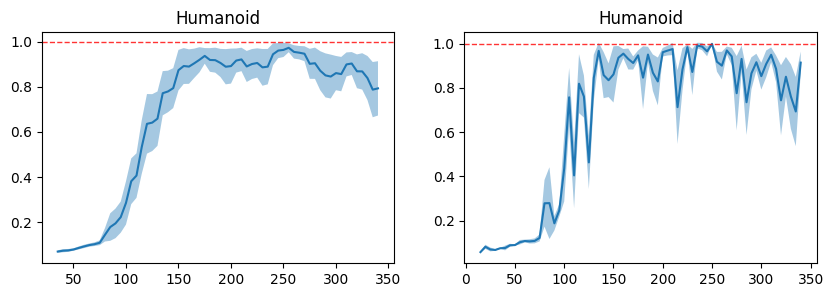

In [6]:
plot_curves('ours-humanoid-1-xyz.csv')

# Plot Lines

In [7]:
def plot_lines(df_path, 
                window=5,
              ):

    df = pandas.read_csv(df_path)
    steps = df["steps"]
    env_id = df_path.split('-')[1].capitalize()
    fig, axs = plt.subplots(1, 2, figsize=(10,3))
    
    for i in range(5):
        r = df[f"r{i}"].rolling(window).mean()
        axs[0].plot(steps, r)
    axs[0].axhline(y=1, c='r', ls='--', lw=1, alpha=0.8)
    axs[0].set_title(f"{env_id}")

    for i in range(5):
        axs[1].plot(steps, df[f"r{i}"])
    axs[1].axhline(y=1, c='r', ls='--', lw=1, alpha=0.8)
    axs[1].set_title(f"{env_id}")

    plt.show()

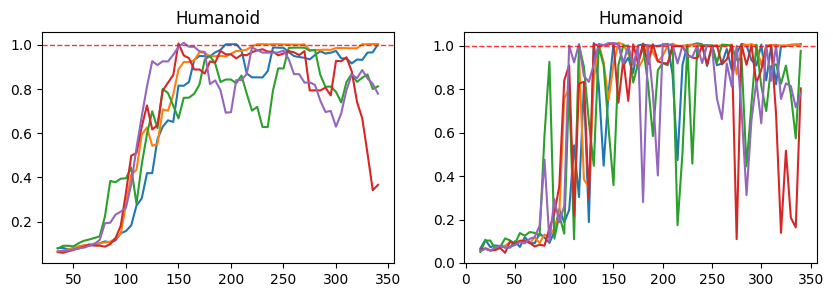

In [8]:
plot_lines('ours-humanoid-1-xyz.csv')

# XYZ (Mu / Std)

In [ ]:
def plot_extra(paths,
            env_id,
            title,
            item='evaluation/Returns Mean',
            d1=True,
            std_coef=0.5, 
            window=5,
            alpha=0.4):
    
    path_s0, path_s1, path_s2, path_s3, path_s4 = paths
    df = x_runs(paths, env_id, d1=d1, save_df=False, item=item) 
    steps, mean, std = df["steps"], df["mean"], df["std"]
    
    ma_mean = mean.rolling(window).mean()
    ma_std = std.rolling(window).mean()

    plt.rcParams["figure.figsize"] = (5,3)
    plt.plot(steps, ma_mean, ls='-')
    plt.fill_between(x=steps, 
                     y1=(ma_mean - std_coef * ma_std), 
                     y2=(ma_mean + std_coef * ma_std),
                     alpha=alpha)
    plt.title(f"{env_id.capitalize()} | {title}")
    plt.show()

In [ ]:
paths = (path_s0, path_s1, path_s2, path_s3, path_s4)
plot_extra(paths, "ant", title='Z Estimation', item='evaluation/EB/Q_Pred Mean', d1=True)

In [ ]:
paths = (path_s0, path_s1, path_s2, path_s3, path_s4)
plot_extra(paths, "ant", title='b value', item='trainer/Bias Value', d1=True)

# Plot (Mu / conf)

In [12]:
def plot_curves(paths, 
                env_id, 
                max_iter,
                window=10,
                alpha=0.4):

    tresholds = {
        'Ant': 4700,
        'Walker': 5000,
        'Humanoid': 5300,
        'HalfCheetah': 5000,
        'Hopper': 3500,
    }
    expert_treshold = tresholds[env_id]
    
    path_s2, path_s3, path_s4 = paths
    def df_util(path, returns=True):
        df = pandas.read_csv(path)[:max_iter]
        if returns:
            return df['evaluation/Returns Mean'].to_numpy()
        else:
            return df['replay_buffer/size'].to_numpy()


    r2 = df_util(path_s2)
    r3 = df_util(path_s3)
    r4 = df_util(path_s4)
    steps = df_util(path_s4, returns=False) // 1000
    returns = np.zeros((max_iter, 3))
    returns[:, 0] = r2
    returns[:, 1] = r3
    returns[:, 2] = r4
    r_mean = returns.mean(axis=1)

    se = st.sem(returns, axis=1)
    _, conf = st.t.interval(0.75, max_iter-1, scale=se)

    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    
    ma_r_mean = pandas.Series(r_mean).rolling(window).mean().to_numpy()
    ma_r_conf = pandas.Series(conf).rolling(window).mean().to_numpy()
    
    axs[0].plot(steps, ma_r_mean, ls='-')
    axs[0].fill_between(x=steps, 
                         y1=(ma_r_mean - ma_r_conf), 
                         y2=(ma_r_mean + ma_r_conf),
                         alpha=alpha)
    axs[0].axhline(y=expert_treshold, c='k', ls='--', lw=1, alpha=0.8)
    axs[0].set_title(f"{env_id}-v2  (mu +/- %95 conf, rolling={window})")

    axs[1].plot(steps, r_mean, ls='-')
    axs[1].fill_between(x=steps, 
                         y1=(r_mean - conf), 
                         y2=(r_mean + conf), 
                         alpha=alpha)
    axs[1].axhline(y=expert_treshold, c='k', ls='--', lw=1, alpha=0.8)
    axs[1].set_title(f"{env_id}-v2  (mu +/- %95 conf)")

    # plt.tight_layout()
    plt.show()

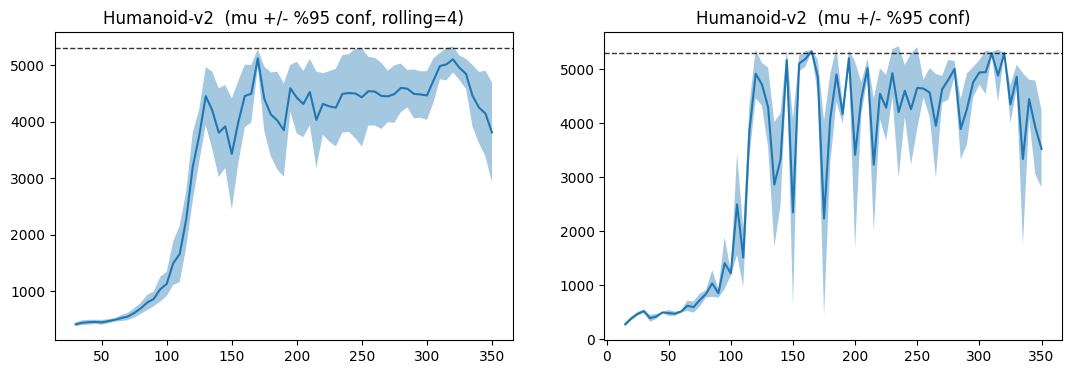

In [13]:
paths = (path_s2, path_s3, path_s4)
plot_curves(paths, 'Humanoid', 68, window=4)

In [ ]:
def plot_curves(paths, 
                env_id, 
                max_iter,
                window=10,
                alpha=0.4):

    tresholds = {
        'Ant': 4700,
        'Walker': 5000,
        'Humanoid': 5000,
        'HalfCheetah': 5000,
        'Hopper': 3500,
    }
    expert_treshold = tresholds[env_id]
    
    path_s0, path_s1, path_s2, path_s3, path_s4 = paths
    def df_util(path, returns=True):
        df = pandas.read_csv(path)[:max_iter]
        if returns:
            return df['evaluation/Returns Mean'].to_numpy()
        else:
            return df['replay_buffer/size'].to_numpy()

    r0 = df_util(path_s0)
    r1 = df_util(path_s1)
    r2 = df_util(path_s2)
    r3 = df_util(path_s3)
    r4 = df_util(path_s4)
    steps = df_util(path_s0, returns=False) // 1000
    returns = np.zeros((max_iter, 5))
    returns[:, 0] = r0
    returns[:, 1] = r1
    returns[:, 2] = r2
    returns[:, 3] = r3
    returns[:, 4] = r4
    r_mean = returns.mean(axis=1)

    se = st.sem(returns, axis=1)
    _, conf = st.t.interval(0.95, max_iter-1, scale=se)

    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    
    ma_r_mean = pandas.Series(r_mean).rolling(window).mean().to_numpy()
    ma_r_conf = pandas.Series(conf).rolling(window).mean().to_numpy()
    
    axs[0].plot(steps, ma_r_mean, ls='-')
    axs[0].fill_between(x=steps, 
                         y1=(ma_r_mean - ma_r_conf), 
                         y2=(ma_r_mean + ma_r_conf),
                         alpha=alpha)
    axs[0].axhline(y=expert_treshold, c='k', ls='--', lw=1, alpha=0.8)
    axs[0].set_title(f"{env_id}-v2  (mu +/- %95 conf, rolling={window})")

    axs[1].plot(steps, r_mean, ls='-')
    axs[1].fill_between(x=steps, 
                         y1=(r_mean - conf), 
                         y2=(r_mean + conf), 
                         alpha=alpha)
    axs[1].axhline(y=expert_treshold, c='k', ls='--', lw=1, alpha=0.8)
    axs[1].set_title(f"{env_id}-v2  (mu +/- %95 conf)")

    # plt.tight_layout()
    plt.show()

In [ ]:
path_s0 = 'data/ant/ant_2024_10_04_00_09_24_0000--s-0/progress.csv'
path_s1 = 'data/ant/ant_2024_10_04_14_47_42_0000--s-1/progress.csv'
path_s2 = 'data/ant/ant_2024_10_04_16_27_29_0000--s-2/progress.csv'
path_s3 = 'data/ant/ant_2024_10_04_18_20_24_0000--s-3/progress.csv'
path_s4 = 'data/ant/ant_2024_10_04_19_58_48_0000--s-4/progress.csv'

In [ ]:
paths = (path_s0, path_s1, path_s2, path_s3, path_s4)
plot_curves(paths, 'Ant', 68, window=5)

# extra

## not important

In [ ]:
def plot_lines(paths, 
                env_id, 
                expert_treshold, 
                max_iter,
                std_coef=0.5,
                rolling=False, 
                window=20):
    
    path_s0, path_s1, path_s2 = paths
    def df_util(path, returns=True):
        df = pandas.read_csv(path)[:max_iter]
        if returns:
            return df['evaluation/Returns Mean']
        else:
            return df['replay_buffer/size']

    r0 = df_util(path_s0)
    r1 = df_util(path_s1)
    r2 = df_util(path_s2)
    steps = df_util(path_s0, returns=False) // 1000
    
    colors = ['b', 'r', 'g']
    fig, axs = plt.subplots(1, 3)
    
    if rolling:
        for i, r in enumerate([r0, r1, r2]):
            r = r.rolling(window).mean()
            axs[i].plot(steps, r, color=colors[i])
            axs[i].axhline(y=expert_treshold, c='b', ls='--', lw=1, alpha=0.8)
            axs[i].set_title(f'seed={i}')
        fig.suptitle(f"{env_id}-v2  (mu+/-{std_coef} std, rolling={window})")
    else:
        for i, r in enumerate([r0, r1, r2]):
            r = r.rolling(window).mean()
            axs[i].plot(steps, r, color=colors[i])
            axs[i].set_title(f'seed={i}')
        fig.suptitle(f"{env_id}-v2  (mu+/-{std_coef} std)")
        
    plt.show()

In [ ]:
paths = (path_s0, path_s1, path_s2, path_s3)
plot_lines(paths, 'Walker', 5000, 300, std_coef=0.5, rolling=False, window=10)
# plot_lines(paths, 'Walker', 5000, 300, std_coef=0.5, rolling=True, window=10)

In [ ]:
def plot_curves(paths, 
                env_id, 
                max_iter,
                item='evaluation/Returns Mean',
                std_coef=0.5, 
                window=10,
                alpha=0.4):

    tresholds = {
        'Ant': 4500,
        'Walker': 5000,
        'Humanoid': 5000,
        'HalfCheetah': 5000,
        'Hopper': 3500,
    }
    expert_treshold = tresholds[env_id]
    
    # path_s0, path_s1, path_s2 = paths
    path_s0, path_s1, path_s2, path_s3, path_s4 = paths
    def df_util(path, is_steps=False):
        df = pandas.read_csv(path)[:max_iter]
        if not is_steps:
            return df[item].to_numpy()
        else:
            return df['replay_buffer/size'].to_numpy()

    r0 = df_util(path_s0)
    r1 = df_util(path_s1)
    r2 = df_util(path_s2)
    r3 = df_util(path_s3)
    r4 = df_util(path_s4)
    steps = df_util(path_s0, is_steps=True) // 1000
    data = np.zeros((max_iter, 5))
    data[:, 0] = r0
    data[:, 1] = r1
    data[:, 2] = r2
    data[:, 3] = r3
    data[:, 4] = r4
    mean = data.mean(axis=1)
    std = data.std(axis=1)

    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    
    ma_mean = pandas.Series(mean).rolling(window).mean().to_numpy()
    ma_std = pandas.Series(std).rolling(window).mean().to_numpy()
    axs[0].plot(steps, ma_mean, ls='-')
    axs[0].fill_between(x=steps, 
                     y1=(ma_mean - std_coef * ma_std), 
                     y2=(ma_mean + std_coef * ma_std),
                     alpha=alpha)
    axs[0].axhline(y=expert_treshold, c='k', ls='--', lw=1, alpha=0.8)
    axs[0].set_title(f"{env_id}-v2  (mu+/-{std_coef} std, rolling={window})")

    axs[1].plot(steps, mean, ls='-')
    axs[1].fill_between(x=steps, 
                     y1=(mean - std_coef * std), 
                     y2=(mean + std_coef * std), 
                     alpha=alpha)
    axs[1].axhline(y=expert_treshold, c='k', ls='--', lw=1, alpha=0.8)
    axs[1].set_title(f"{env_id}-v2  (mu+/-{std_coef} std)")

    plt.show()
    
paths = (path_s0, path_s1, path_s2, path_s3, path_s4)
plot_curves(paths, 'Walker', 68, std_coef=0.5, window=5)

## rolling mean

In [ ]:
def create_df(path_s0, path_s1, path_s2, max_iter):
    s0 = pandas.read_csv(path_s0)[:max_iter]
    s1 = pandas.read_csv(path_s1)[:max_iter]
    s2 = pandas.read_csv(path_s2)[:max_iter]
    r0 = s0['evaluation/Returns Mean']
    r1 = s1['evaluation/Returns Mean']
    r2 = s2['evaluation/Returns Mean']
    steps = s0['replay_buffer/size']
    
    def util(data, seed, steps, window=10):
        df = pandas.DataFrame(data)
        df.columns = ['Returns']
        df['Moving Returns'] = df['Returns'].rolling(window=window).mean()
        df.bfill(inplace=True)
        df['Seed'] = seed
        df.index = steps
        df.index.name = 'Steps'
        return df
        
    r0 = util(r0, 0, steps)
    r1 = util(r1, 1, steps)
    r2 = util(r2, 2, steps)
    df = pandas.concat([r0, r1, r2], ignore_index=False)
    return df
    
df = create_df(path_s0, path_s1, path_s2, max_iter=300)
df = df.drop(['Returns'], axis=1)

In [ ]:
def plotty_ma(df, env_name, error_name, treshold):
    error_val = 95 if error_name == 'ci' else 0.5
    fig, ax = plt.subplots()
    sns.lineplot(data=df, x='Steps', y='Moving Returns', errorbar=(error_name, error_val), label='ours', ax=ax)
    ax.axhline(treshold, ls='--', c='red', label='expert')
    ax.ticklabel_format(style='scientific', scilimits=(3,3), axis='both', useMathText=True)
    ax.legend(loc='lower right')
    plt.title(f'{env_name} ({error_name} {error_val} | window=5)')
    ax.set_xlabel('Steps')
    ax.set_ylabel('Returns')
    # plt.savefig()
    plt.show()

In [ ]:
plotty_ma(df, 'Walker', 'ci', 5000)
plotty_ma(df, 'Walker', 'sd', 5000)

## mean

In [ ]:
def create_df(path_s0, path_s1, path_s2, max_iter):
    s0 = pandas.read_csv(path_s0)[:max_iter]
    s1 = pandas.read_csv(path_s1)[:max_iter]
    s2 = pandas.read_csv(path_s2)[:max_iter]
    r0 = s0['evaluation/Returns Mean']
    r1 = s1['evaluation/Returns Mean']
    r2 = s2['evaluation/Returns Mean']
    steps = s0['replay_buffer/size']
    
    def util(data, seed, steps):
        df = pandas.DataFrame(data)
        df.columns = ['Returns']
        df['Seed'] = seed
        df.index = steps
        df.index.name = 'Steps'
        return df
        
    r0 = util(r0, 0, steps)
    r1 = util(r1, 1, steps)
    r2 = util(r2, 2, steps)
    df = pandas.concat([r0, r1, r2], ignore_index=False)
    return df
    
df = create_df(path_s0, path_s1, path_s2, max_iter=300)

In [ ]:
def plotty(df, env_name, error_name, treshold):
    error_val = 95 if error_name == 'ci' else 0.5
    fig, ax = plt.subplots()
    sns.lineplot(data=df, x='Steps', y='Returns', errorbar=(error_name, error_val), label='ours', ax=ax)
    ax.axhline(treshold, ls='--', c='red', label='expert')
    ax.ticklabel_format(style='scientific', scilimits=(3,3), axis='both', useMathText=True)
    ax.legend(loc='lower right')
    plt.title(f'{env_name} ({error_name} {error_val})')
    ax.set_xlabel('Steps')
    ax.set_ylabel('Returns')
    # plt.savefig()
    plt.show()

In [ ]:
plotty(df, 'Walker', 'ci', 5000)
plotty(df, 'Walker', 'sd', 5000)

In [ ]:
def plot_curves(paths, 
                env_id, 
                max_iter,
                std_coef=0.5,
                rolling=False, 
                window=20):

    tresholds = {
        'Ant': 4500,
        'Walker': 5000,
        'Humanoid': 5000,
        'HalfCheetah': 5000,
        'Hopper': 3500,
    }
    expert_treshold = tresholds[env_id]
    
    path_s0, path_s1, path_s2 = paths
    def df_util(path, returns=True):
        df = pandas.read_csv(path)[:max_iter]
        if returns:
            return df['evaluation/Returns Mean'].to_numpy()
        else:
            return df['replay_buffer/size'].to_numpy()

    r0 = df_util(path_s0)
    r1 = df_util(path_s1)
    r2 = df_util(path_s2)
    steps = df_util(path_s0, returns=False) // 1000
    returns = np.zeros((max_iter, 3))
    returns[:, 0] = r0
    returns[:, 1] = r1
    returns[:, 2] = r2
    r_mean = returns.mean(axis=1)
    r_std = returns.std(axis=1)

    if rolling:
        ma_r_mean = pandas.Series(r_mean).rolling(window).mean().to_numpy()
        ma_r_std = pandas.Series(r_std).rolling(window).mean().to_numpy()
        plt.plot(steps, ma_r_mean, label='iDSAC')
        plt.fill_between(x=steps, 
                         y1=(ma_r_mean - std_coef * ma_r_std), 
                         y2=(ma_r_mean + std_coef * ma_r_std), 
                         alpha=0.2)
        plt.title(f"{env_id}-v2  (mu+/-{std_coef} std, rolling={window})")
        # plt.xlim(5 + window, 10 + max_iter)
    else:
        plt.plot(steps, r_mean, label='iDSAC')
        plt.fill_between(x=steps, 
                         y1=(r_mean - std_coef * r_std), 
                         y2=(r_mean + std_coef * r_std), 
                         alpha=0.2)
        plt.title(f"{env_id}-v2  (mu+/-{std_coef} std)")
        # plt.xlim(5, 10 + max_iter)
        
    plt.axhline(y=expert_treshold, c='r', ls='--', lw=1, alpha=0.8, label='expert')
    plt.legend(loc='lower right')
    plt.xlabel("Steps (1k)")
    plt.ylabel("Episode Rewards")
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_lines(paths, 
                env_id, 
                max_iter,
                std_coef=0.5,
                rolling=False, 
                window=20):

    tresholds = {
        'Ant': 4500,
        'Walker': 5000,
        'Humanoid': 5000,
        'HalfCheetah': 5000,
        'Hopper': 3500,
    }
    expert_treshold = tresholds[env_id]
    
    path_s0, path_s1, path_s2 = paths
    def df_util(path, returns=True):
        df = pandas.read_csv(path)[:max_iter]
        if returns:
            return df['evaluation/Returns Mean']
        else:
            return df['replay_buffer/size']

    r0 = df_util(path_s0)
    r1 = df_util(path_s1)
    r2 = df_util(path_s2)
    steps = df_util(path_s0, returns=False) // 1000
    
    colors = ['b', 'r', 'g']
    
    if rolling:
        for i, r in enumerate([r0, r1, r2]):
            r = r.rolling(window).mean()
            plt.plot(steps, r, color=colors[i])
        plt.axhline(y=expert_treshold, c='k', ls='--', lw=1, alpha=0.8)
        plt.title(f"{env_id}-v2 , rolling={window})")
    else:
        for i, r in enumerate([r0, r1, r2]):
            plt.plot(steps, r, color=colors[i])
        plt.axhline(y=expert_treshold, c='k', ls='--', lw=1, alpha=0.8)
        plt.title(f"{env_id}-v2")
        
    plt.show()
    plt.close()